In [1]:
import scanpy as sc
import omicverse as ov
ov.plot_set(font_path='Arial')

# Enable auto-reload for development
%load_ext autoreload
%autoreload 2

🔬 Starting plot initialization...
Using already downloaded Arial font from: /tmp/omicverse_arial.ttf
Registered as: Arial
🧬 Detecting CUDA devices…
✅ [GPU 0] NVIDIA H100 80GB HBM3
    • Total memory: 79.1 GB
    • Compute capability: 9.0

   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

🔖 Version: 1.7.6rc1   📚 Tutorials: https://omicverse.readthedocs.io/
✅ plot_set complete.



- s1d3: https://figshare.com/ndownloader/files/41932005
- s2d1: https://figshare.com/ndownloader/files/41932011
- s3d7: https://figshare.com/ndownloader/files/41932008

In [2]:
adata1=ov.read('data/neurips2021_s1d3.h5ad')
adata1.obs['batch']='s1d3'
adata2=ov.read('data/neurips2021_s2d1.h5ad')
adata2.obs['batch']='s2d1'
adata3=ov.read('data/neurips2021_s3d7.h5ad')
adata3.obs['batch']='s3d7'

In [3]:
adata=sc.concat([adata1,adata2,adata3],merge='same')
adata

AnnData object with n_obs × n_vars = 27423 × 13953
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train'
    var: 'feature_types', 'gene_id'
    obsm: 'ADT_X_pca', 'ADT_X_umap', 'ADT_isotype_controls', 'GEX_X_pca', 'GEX_X_umap'
    layers: 'counts'

## scfoundation

we need to download the model checkpoint from here: https://hopebio2020.sharepoint.com/:f:/s/PublicSharedfiles/EmUQnvZMETlDvoCaBduCNeIBQArcOrd8T8iEpiGofFZ9CQ?e=3SpPZU


In [10]:
manager = ov.llm.SCLLMManager(
    model_type="scfoundation",
    model_path="llm_model/models/scfoundation/models.ckpt",
)

[Loaded] Gene list loaded: 19264 genes
[Loading] Loading scFoundation model with key 'cell'
[Preprocessing] Inspecting checkpoint format
[Loaded] Found 'cell' key - MMF format
{'mask_gene_name': False, 'gene_num': 19266, 'seq_len': 19266, 'encoder': {'hidden_dim': 768, 'depth': 12, 'heads': 12, 'dim_head': 64, 'seq_len': 19266, 'module_type': 'transformer', 'norm_first': False}, 'decoder': {'hidden_dim': 512, 'depth': 6, 'heads': 8, 'dim_head': 64, 'module_type': 'performer', 'seq_len': 19266, 'norm_first': False}, 'n_class': 104, 'pad_token_id': 103, 'mask_token_id': 102, 'bin_num': 100, 'bin_alpha': 1.0, 'rawcount': True, 'model': 'mae_autobin', 'test_valid_train_idx_dict': '/nfs_beijing/minsheng/data/os10000w-new/global_shuffle/meta.csv.train_set_idx_dict.pt', 'valid_data_path': '/nfs_beijing/minsheng/data/valid_count_10w.npz', 'num_tokens': 13, 'train_data_path': None, 'isPanA': False, 'isPlanA1': False, 'max_files_to_load': 5, 'bin_type': 'auto_bin', 'value_mask_prob': 0.3, 'zero_

In [11]:
adata=ov.pp.preprocess(adata,mode='shiftlog|pearson',
                       n_HVGs=3000,batch_key=None,target_sum=1e4)
adata

Begin robust gene identification
After filtration, 13953/13953 genes are kept.     Among 13953 genes, 13953 genes are robust.
End of robust gene identification.
Begin size normalization: shiftlog and HVGs selection pearson
normalizing counts per cell
The following highly-expressed genes are not considered during normalization factor computation:
['IGKC', 'HBB', 'MALAT1', 'IGHA1', 'IGHM', 'HBA2', 'IGLC1', 'IGLC2', 'IGLC3']
    finished (0:00:00)
extracting highly variable genes
--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'highly_variable_nbatches', int vector (adata.var)
    'highly_variable_intersection', boolean vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'residual_variances', float vector (adata.var)
Time to analyze data in cpu: 3.353630304336548 seconds.
End of size normalization: shiftlog and HVGs selection pearson


AnnData object with n_obs × n_vars = 27423 × 13953
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train'
    var: 'feature_types', 'gene_id', 'n_cells', 'percent_cells', 'robust', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_features'
    uns: 'log1p', 'hvg', 'status', 'status_args', 'REFERENCE_MANU'
    obsm: 'ADT_X_pca', 'ADT_X_umap', 'ADT_isotype_controls', 'GEX_X_pca', 'GEX_X_umap'
    layers: 'counts'

In [12]:
adata.raw = adata
adata = adata[:, adata.var.highly_variable_features]
adata

View of AnnData object with n_obs × n_vars = 27423 × 3000
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train'
    var: 'feature_types', 'gene_id', 'n_cells', 'percent_cells', 'robust', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_features'
    uns: 'log1p', 'hvg', 'status', 'status_args', 'REFERENCE_MANU'
    obsm: 'ADT_X_pca', 'ADT_X_umap', 'ADT_isotype_controls', 'GEX_X_pca', 'GEX_X_umap'
    layers: 'counts'

[🔬Cells] Data Summary:
    Cells: 27,423
    Genes: 3,000
    Batches: 3
      s3d7: 11,230 cells
      s2d1: 10,258 cells
      s1d3: 5,935 cells
[Embedding] Starting get_embeddings...
    cells: 27,423
    genes: 3,000
[Preprocessing] Preprocessing data for scFoundation
[ℹ️Info] Input: (27423, 3000), Type: singlecell
[Preprocessing] Filtering genes to match scFoundation gene set
[Loaded] Gene matching: 2553 matched, 16711 padded
[ℹ️Info] Data already normalized and log-transformed
[Loaded] Added total count info (mean: 1055.64)
[Loaded] Preprocessing completed: (27423, 19264)
    [Embedding] Generating cell embeddings...
    Data shape: (27423, 19264)
    [Preprocessing] Processing cells...


    Generated embeddings: (27423, 3072)
[✅Complete] get_embeddings completed successfully!
[✅Complete] Results summary:
    embedding_shape: (27423, 3072)
    embedding_dim: 3,072
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:28)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:00:21)


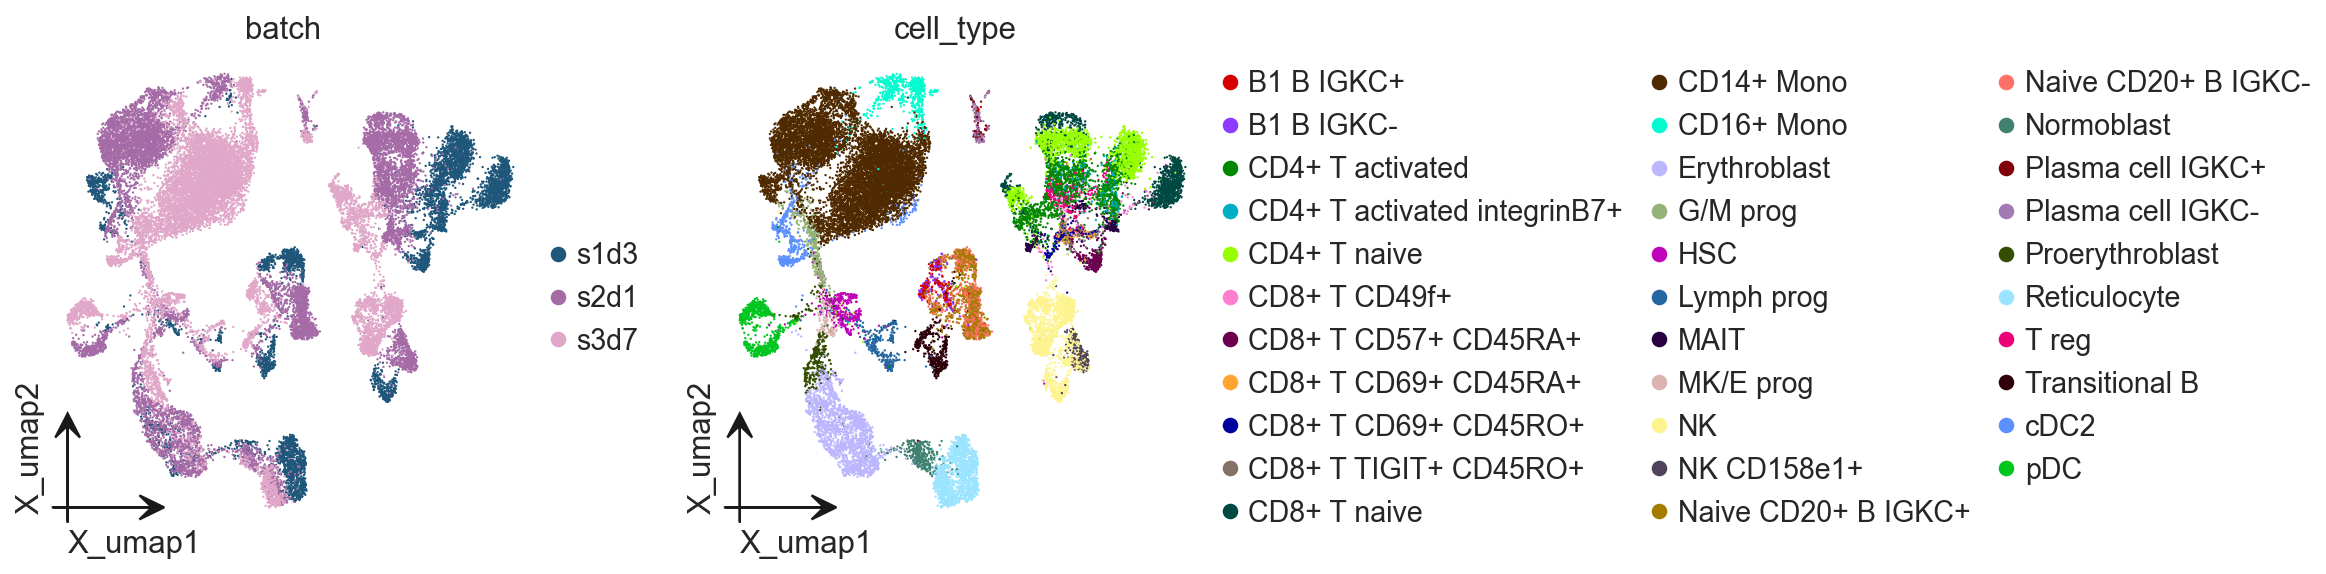

In [13]:
embeddings = manager.get_embeddings(
    adata,pre_normalized="T",  # True - data already normalized
    input_type="singlecell"
)

adata.obsm['X_scfoundation'] = embeddings

sc.pp.neighbors(adata, use_rep='X_scfoundation')
sc.tl.umap(adata)
ov.pl.embedding(
    adata, 
    basis='X_umap',
    color=['batch', 'cell_type']
)

In [38]:
reference_adata=adata[adata.obs['batch']=='s1d3']

In [39]:
reference_adata.obs['celltype']=reference_adata.obs['cell_type'].copy()

In [40]:
fine_tune_results = manager.model.fine_tune(
    train_adata=reference_adata,
    epochs=5,
    batch_size=32,
    pre_normalized="T",
    lr=1e-3,
    frozen_more=True  
)


🚀 Starting scFoundation fine-tuning for annotation task...
Found 30 cell types: ['B1 B IGKC+', 'B1 B IGKC-', 'CD4+ T activated', 'CD4+ T activated integrinB7+', 'CD4+ T naive', 'CD8+ T CD49f+', 'CD8+ T CD57+ CD45RA+', 'CD8+ T CD69+ CD45RA+', 'CD8+ T CD69+ CD45RO+', 'CD8+ T TIGIT+ CD45RO+', 'CD8+ T naive', 'CD14+ Mono', 'CD16+ Mono', 'Erythroblast', 'G/M prog', 'HSC', 'Lymph prog', 'MAIT', 'MK/E prog', 'NK', 'Naive CD20+ B IGKC+', 'Naive CD20+ B IGKC-', 'Normoblast', 'Plasma cell IGKC+', 'Proerythroblast', 'Reticulocyte', 'T reg', 'Transitional B', 'cDC2', 'pDC']
Preprocessing data for scFoundation...
Input shape: (5935, 3000)
Pre-normalized: T, Input type: singlecell
Filtering and padding genes to match scFoundation gene set...
Gene matching results:
  Matched genes: 2632
  Padded genes: 16632
  Total genes: 19264
Data already normalized and log-transformed
Added total count information (mean: 878.33)
Preprocessing completed. Final shape: (5935, 19264)
Token and position embeddings fro

Preprocessing data for scFoundation...
Input shape: (27423, 3000)
Pre-normalized: T, Input type: singlecell
Filtering and padding genes to match scFoundation gene set...
Gene matching results:
  Matched genes: 2632
  Padded genes: 16632
  Total genes: 19264
Data already normalized and log-transformed
Added total count information (mean: 968.29)
Preprocessing completed. Final shape: (27423, 19264)
🔄 Starting batch integration using scFoundation embeddings...
Batch key: 'batch', Correction method: 'mnn'
Found 3 batches: ['s1d3', 's2d1', 's3d7']
Extracting scFoundation embeddings...
Generating cell embeddings...
Processing cells...


100%|██████████| 27423/27423 [05:59<00:00, 76.32it/s]


Generated embeddings shape: (27423, 3072)
Embeddings shape: (27423, 3072)
Applying MNN correction...
✓ Integration completed using mnn
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:11)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:00:19)


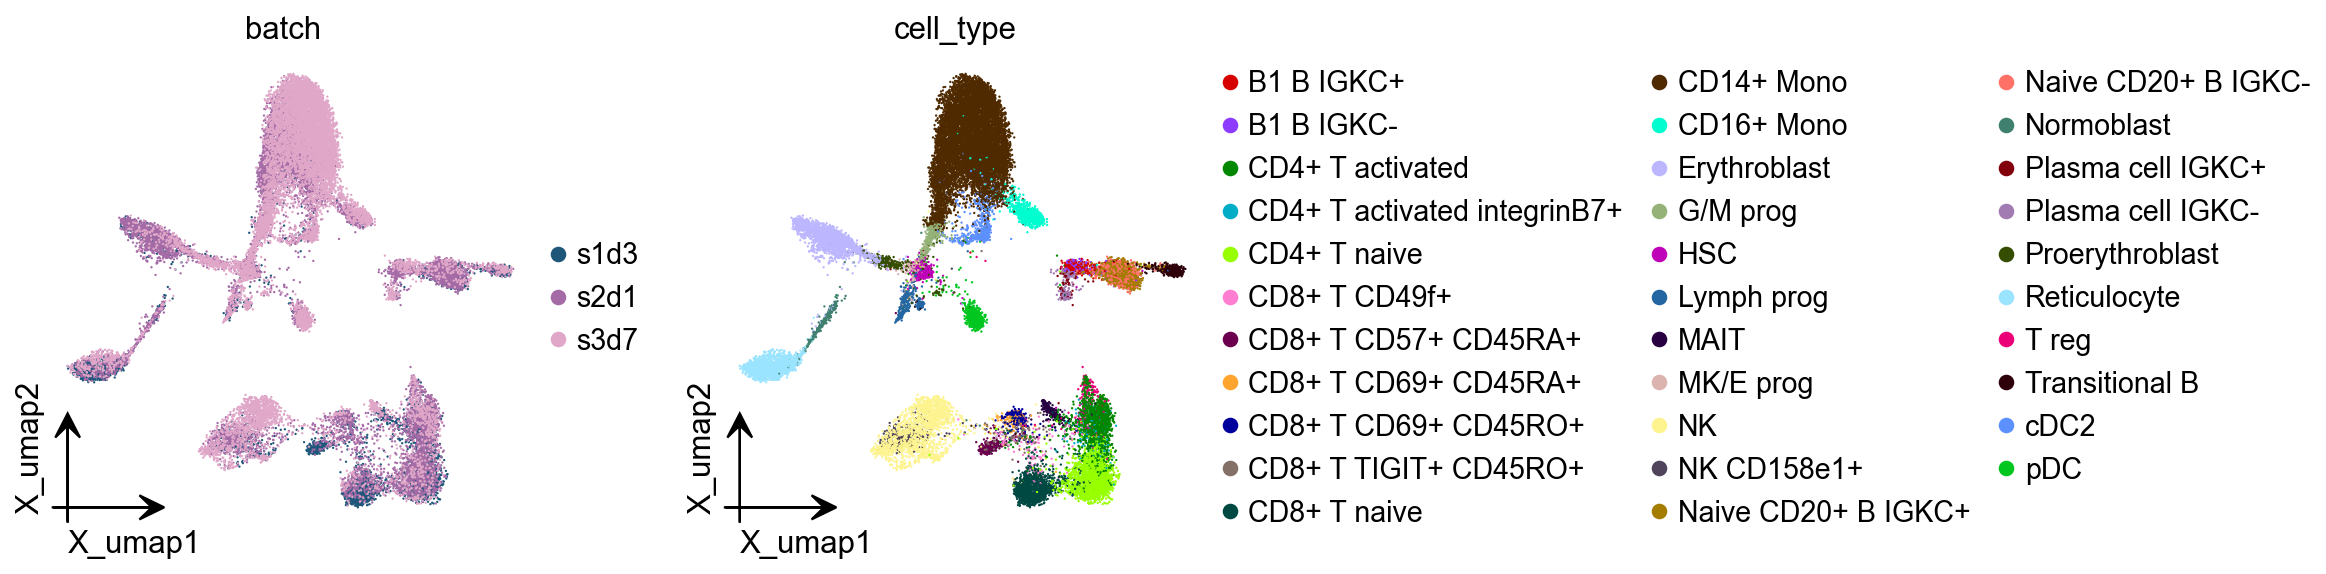

In [41]:
results = manager.model.predict(
    adata,
    task="integration",
    batch_key="batch",
    correction_method="mnn",
    pre_normalized="T",
)
adata.obsm['X_scfoundation_fine'] = results['embeddings']
sc.pp.neighbors(adata, use_rep='X_scfoundation_fine')
sc.tl.umap(adata)
ov.pl.embedding(
    adata, 
    basis='X_umap',
    color=['batch', 'cell_type']
)

In [42]:
results_anno = manager.model.predict(
    adata,
    task="annotation",
    pre_normalized="T",
)

Preprocessing data for scFoundation...
Input shape: (27423, 3000)
Pre-normalized: T, Input type: singlecell
Filtering and padding genes to match scFoundation gene set...
Gene matching results:
  Matched genes: 2632
  Padded genes: 16632
  Total genes: 19264
Data already normalized and log-transformed
Added total count information (mean: 968.29)
Preprocessing completed. Final shape: (27423, 19264)
Using fine-tuned scFoundation model for annotation...
🔍 Predicting cell types using fine-tuned scFoundation model...
Preprocessing data for scFoundation...
Input shape: (27423, 19264)
Pre-normalized: T, Input type: singlecell
Filtering and padding genes to match scFoundation gene set...
Gene matching results:
  Matched genes: 19264
  Padded genes: 0
  Total genes: 19264
Data already normalized and log-transformed
Added total count information (mean: 968.29)
Preprocessing completed. Final shape: (27423, 19264)
PredictionDataset created with 27423 samples
Expression shape: torch.Size([27423, 192

In [ ]:
adata.obs['predicted_celltype']=results_anno['predicted_celltypes']